# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [43]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

from scipy import stats

In [44]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [45]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [46]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

### Plotting Race vs Call

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [48]:
df = data[['race','call']]

In [49]:
df.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [50]:
w = df[data.race=='w']
b = df[data.race=='b']

In [51]:
b_callbacks = b.call.sum()
b_len = len(b)
percent_b = (b_callbacks*100) / b_len
percent_b

6.447638603696099

In [52]:
w_callbacks = w.call.sum()
w_len = len(w)
percent_w = (w_callbacks * 100) / w_len
percent_w

9.650924024640657

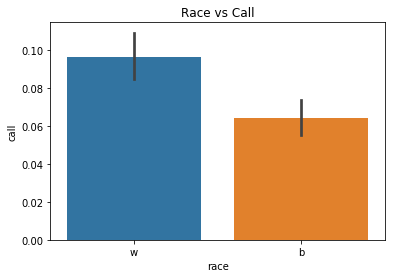

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='race',y='call',data=df)
plt.title('Race vs Call')
plt.show()

### Statistical test

Two-sample t-test. 

Null hypothesis = There is no difference between the callback rates between blacks and whites

In [54]:
stats.ttest_ind(w.call,b.call)

Ttest_indResult(statistic=4.114705290861751, pvalue=3.940802103128886e-05)

According to the t-test, the p-value is lower than 0.05 (5%) and so we can reject the null hypothesis. This means that there is a significant difference between callback rates between whites and blacks

### Bootstrap hypothesis test

In [55]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    def bootstrap_replicate_1d(data, func):
        return func(np.random.choice(data, size=len(data)))

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [56]:
b_callrates = b.call

#resmample the sample 10,000 times and calculate the mean of all 10,000 samples

bs_samples = draw_bs_reps(b_callrates, np.mean, 10000)
#calculate the mean of distribution of means
bs_mean = np.mean(bs_samples)
#calculate the standard deviation of distribution of means
bs_std = np.std(b_callrates) / np.sqrt(len(b_callrates))
percentiles = np.percentile(bs_samples, [2.5,97.5])
#calculate the 95% percentile
print('mean: ',bs_mean,'\nstandard deviation: ', bs_std, '\n95% confidence intervals: ', percentiles)

mean:  0.06446476375088096 
standard deviation:  0.004977108869798699 
95% confidence intervals:  [0.0550308  0.07433265]


In [57]:
w_callrates = w.call

#resmample the sample 10,000 times and calculate the mean of all 10,000 samples

bs_samples = draw_bs_reps(w_callrates, np.mean, 10000)
#calculate the mean of distribution of means
bs_mean = np.mean(bs_samples)
#calculate the standard deviation of distribution of means
bs_std = np.std(w_callrates) / np.sqrt(len(w_callrates))
percentiles = np.percentile(bs_samples, [2.5,97.5])
#calculate the 95% percentile
print('mean: ',bs_mean,'\nstandard deviation: ', bs_std, '\n95% confidence intervals: ', percentiles)

mean:  0.09649700206294656 
standard deviation:  0.0059840016981803105 
95% confidence intervals:  [0.085      0.10841889]


Since mean of white call rates 9.65% is outside the confidence interval of black call rates of 5.46% to 7.43%, we can reject the null hypothesis and conclude that, mean of white callrate is different than black callrate. 

In [58]:
# Your solution to Q3 here

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>